In [1]:
import pandas as pd
import numpy as np
import random
import math
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

In [2]:
df = pd.read_csv('data.csv')
x_coords = df['XCOORD'].tolist()
y_coords = df['YCOORD'].tolist()

In [3]:
def update_coordinates(x_coords, y_coords, e):
    x_new = [x + 2*e*math.cos(e*math.pi/2) for x in x_coords]
    y_new = [y + 2*e*math.sin(e*math.pi/2) for y in y_coords]
    return x_new, y_new

In [6]:
random.seed(42)
np.random.seed(42)
for e in range(6):
    x_coords, y_coords = update_coordinates(x_coords, y_coords, e)
    
    num_customers = 50 + e * 10
    distance_matrix = np.zeros((num_customers, num_customers))
    for i in range(num_customers):
        for j in range(num_customers):
            if i != j:
                distance_matrix[i][j] = np.sqrt((x_coords[i] - x_coords[j]) ** 2 + (y_coords[i] - y_coords[j]) ** 2)
    
    creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMin)

    toolbox = base.Toolbox()
    toolbox.register("indices", random.sample, range(num_customers), num_customers)
    toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)
    
    def evaluate_tsp(individual):
        total_distance = 0
        for i in range(len(individual) - 1):
            total_distance += distance_matrix[individual[i]][individual[i + 1]]
        total_distance += distance_matrix[individual[-1]][individual[0]]  # Return to starting point
        return total_distance,
    
    toolbox.register("evaluate", evaluate_tsp)
    toolbox.register("mate", tools.cxOrdered)
    toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)
    toolbox.register("select", tools.selTournament, tournsize=3)

    population = toolbox.population(n=800)
    
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("min", np.min)
    best = tools.selBest(population, k=1)[0]
    best_distance = evaluate_tsp(best)[0]
    
    for gen in range(100):
        offspring = algorithms.varAnd(population, toolbox, cxpb=0.7, mutpb=0.2)
        fits = toolbox.map(toolbox.evaluate, offspring)
        for fit, ind in zip(fits, offspring):
            ind.fitness.values = fit
        population = toolbox.select(offspring + population, k=len(population))
        hof.update(population)
        best = tools.selBest(population, k=1)[0]
        best_distance = evaluate_tsp(best)[0]
    print(f"environment-{e}, best distance-{best_distance}")

E:\Anaconda3\envs\torch\lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
E:\Anaconda3\envs\torch\lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


environment-0, best distance-327.00105631985576
environment-1, best distance-482.2153600811
environment-2, best distance-625.0670158120989
environment-3, best distance-683.0046940785197
environment-4, best distance-857.4072867728171
environment-5, best distance-1022.0361320944975


In [4]:
def evaluate_tsp(individual, distance_matrix):
    total_distance = 0
    for i in range(len(individual) - 1):
        total_distance += distance_matrix[individual[i]][individual[i + 1]]
    # total_distance += distance_matrix[individual[-1]][individual[0]]  # Return to starting point
    return total_distance,

In [6]:
random.seed(42)
np.random.seed(42)
previous_solution = []
for e in range(6):
    x_coords, y_coords = update_coordinates(x_coords, y_coords, e)
    
    if e == 0:
        num_customers = 50
        distance_matrix = np.zeros((num_customers, num_customers))
        for i in range(num_customers):
            for j in range(num_customers):
                if i != j:
                    distance_matrix[i][j] = np.sqrt((x_coords[i] - x_coords[j]) ** 2 + (y_coords[i] - y_coords[j]) ** 2)
    else:
        num_customers = 10
        distance_matrix = np.zeros((num_customers, num_customers))
        for i in range(10):
            for j in range(10):
                if i != j:
                    distance_matrix[i][j] = np.sqrt((x_coords[40+10*e+i] - x_coords[40+10*e+j]) ** 2 + (y_coords[40+10*e+i] - y_coords[40+10*e+j]) ** 2)
                    
    complete_distance_matrix = np.zeros((50+10*e, 50+10*e))
    for i in range(50+10*e):
        for j in range(50+10*e):
            if i != j:
                complete_distance_matrix[i][j] = np.sqrt((x_coords[i] - x_coords[j]) ** 2 + (y_coords[i] - y_coords[j]) ** 2)
                
    creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMin)

    toolbox = base.Toolbox()
    toolbox.register("indices", random.sample, range(num_customers), num_customers)
    toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)
    
    toolbox.register("evaluate", evaluate_tsp, distance_matrix=distance_matrix)
    toolbox.register("mate", tools.cxOrdered)
    toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)
    toolbox.register("select", tools.selTournament, tournsize=3)

    population = toolbox.population(n=800)
    
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("min", np.min)
    
    for gen in range(100):
        offspring = algorithms.varAnd(population, toolbox, cxpb=0.7, mutpb=0.2)
        fits = toolbox.map(toolbox.evaluate, offspring)
        for fit, ind in zip(fits, offspring):
            ind.fitness.values = fit
        population = toolbox.select(offspring + population, k=len(population))
        hof.update(population)
        best = tools.selBest(population, k=1)[0]
        best_single_distance = evaluate_tsp(best, distance_matrix)[0]
    previous_solution += list(best)
    best_distance = evaluate_tsp(previous_solution, complete_distance_matrix)
    print(f"environment {e}, part best distance {best_single_distance}, best distance {best_distance}")
    

E:\Anaconda3\envs\torch\lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
E:\Anaconda3\envs\torch\lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


environment 0, part best distance 295.78448589324756, best distance (295.78448589324756,)
environment 1, part best distance 104.57068724183203, best distance (535.3257156075781,)
environment 2, part best distance 95.28650381374005, best distance (779.5683574219245,)
environment 3, part best distance 105.09507207287827, best distance (998.1319255936779,)
environment 4, part best distance 108.95985876450091, best distance (1185.1733016444675,)
environment 5, part best distance 139.36749483642615, best distance (1403.2672464654893,)


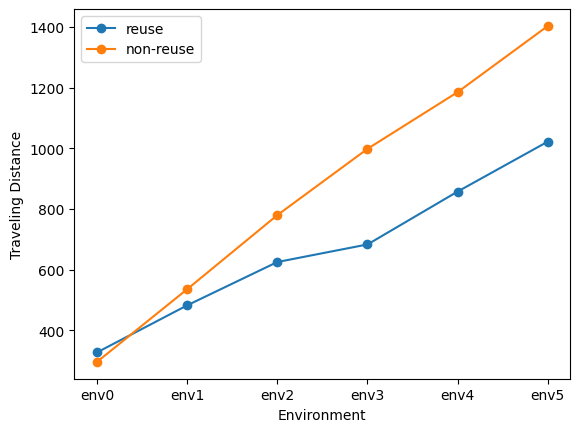

In [9]:
import matplotlib.pyplot as plt
reuse = [327.001, 482.22, 625.06, 683.00, 857.41, 1022.04]
non_reuse = [295.78, 535.33, 779.57, 998.13, 1185.17, 1403.27]
x_axis = ["env0", "env1", "env2", "env3", "env4", "env5"]
plt.plot(x_axis, reuse, marker='o', linestyle='-', label='reuse')
plt.plot(x_axis, non_reuse, marker='o', linestyle='-', label='non-reuse')
plt.xlabel("Environment")
plt.ylabel('Traveling Distance')
plt.legend()
plt.savefig("fig6.png")
plt.show()